In [49]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 


In [2]:
#let's look at the original
org_data_dir = '/scratch/connectome/dyhan316/VAE_ADHD/MRI_augment/voxelmorph/data/'

#npz_list = []
npz_dict = {}
for file in os.listdir(org_data_dir):
    if file.split('.')[-1] == "npz":
        npz_dict[file] = np.load(org_data_dir + file) #if file.split('.')[-1] == "npz" else print(f"{file} is not npz lol")
    #npz_list.append(np.load(org_data_dir + file)) if file.split('.')[-1] == "npz" else print(f"{file} is not npz lol")

In [30]:
total_files = []
for i, npz in npz_dict.items():
    files = []
    print(f"==={i}===")
    for file in npz:
        print(file, end = ' | ')
        files.append(npz[file])
    total_files.append(files)
    print([i.shape for i in files])
    del npz  #much faster I think because we're reducing the RAM used

===test_scan.npz===
vol | seg | [(160, 192, 224), (160, 192, 224)]
===prob_atlas_mapping.npz===
mapping | [(41,)]
===generated_uncond_atlas.npz===
vol | [(160, 192, 224)]
===atlas.npz===
vol | seg | train_avg | [(160, 192, 224), (160, 192, 224), (256,)]
===prob_atlas_T1_stats.npz===
init_mu | init_sigma | [(11,), (11,)]
===prob_atlas.npz===
vol | [(160, 192, 224, 41)]
===labels.npz===
labels | [(30,)]


0.0 255.0
{0.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 24.0, 26.0, 28.0, 30.0, 31.0, 41.0, 42.0, 43.0, 44.0, 46.0, 47.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 58.0, 60.0, 62.0, 63.0, 72.0, 77.0, 80.0, 85.0, 251.0, 252.0, 253.0, 254.0, 255.0}


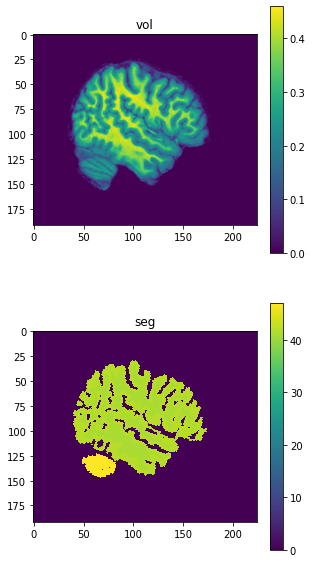

In [51]:
###test_scan.npz###
fig, axs = plt.subplots(2, figsize = (5,10))
im = axs[0].imshow(total_files[0][0][30])
axs[0].set_title("vol")
plt.colorbar(im, ax = axs[0])

im = axs[1].imshow(total_files[0][1][30])
plt.colorbar(im, ax = axs[1])
axs[1].set_title("seg")
print(np.min(total_files[0][1]),np.max(total_files[0][1]))

print(set(total_files[0][1].flatten())) #즉, 0~255까지 총 256개...
#256개의 segmentation결과들...? 

In [60]:
###prob_atlas_mapping.mpz###
print(total_files[1][0]) #just np array with 41 things...? 이건 뭐지...

[ 0  5  7  1  5  1  6  6  4  4  7  7  5  7  7  7  2  5  5  7  7  8  8  3
  3  7  9  9  5  5 10 10  7  5  5  5  7  1  5  5  7]


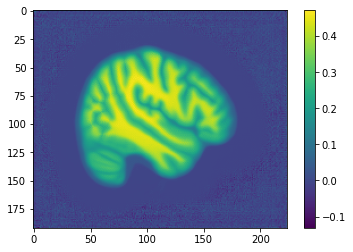

In [64]:
###generated+uncond_atlas.npz
plt.imshow(total_files[2][0][30])
plt.colorbar()
#이건 뭐지,,,>

0.0 255.0
{0.0, 0.27256129890112074, 0.39114233148677247, 0.34344419641731483, 0.2521409334477762, 0.3544461265271003, 0.3079003901352785, 0.33478783856323946, 0.12528158066718165, 0.2978087414957912, 0.24639270191683432, 0.33482880887908656, 0.2705822846645812, 0.28920478730755433, 0.27584988084246687, 0.3635756552085004, 0.13933354487391247, 0.27585510053146634, 0.2556801344427633, 0.2789389970112957, 0.16560548026988792, 0.3487596675651375, 0.14996206605088871, 0.11761132440913916, 0.19905149894338012, 0.0905652866222462, 0.30433287565002143, 0.25222194966509287, 0.20547231723702317, 0.40687240794607415, 0.38654224546192245, 0.2614353634017867, 0.3003969989173971, 0.2756408331667698, 0.19891322629455516, 0.3952903757366157, 0.08790830661284642, 0.38784306726055245, 0.3322968342448697, 0.3025381541231197, 0.39683230533343816, 0.39829640978539316, 0.3688593810140917, 0.38776492890873887, 0.4186093139626655, 0.015886461206038757, 0.34063430482294865}


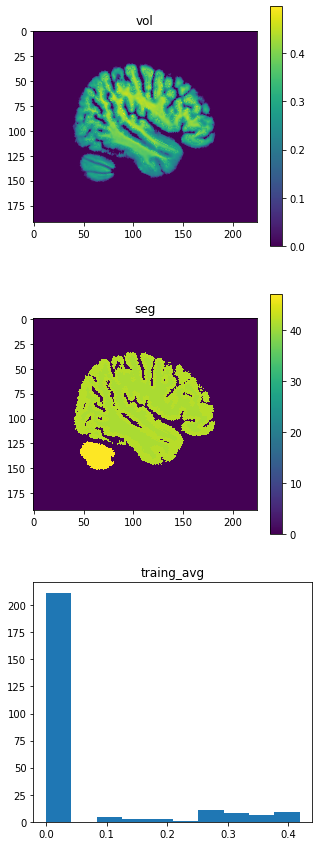

In [70]:
###atlas.npz
fig, axs = plt.subplots(3, figsize = (5,15))
im = axs[0].imshow(total_files[3][0][30])
axs[0].set_title("vol")
plt.colorbar(im, ax = axs[0])

im = axs[1].imshow(total_files[3][1][30])
plt.colorbar(im, ax = axs[1])
axs[1].set_title("seg")
print(np.min(total_files[0][1]),np.max(total_files[0][1]))


axs[2].hist(total_files[3][2])
axs[2].set_title("traing_avg")
print(set(total_files[3][2].flatten())) #즉, 0~255까지 총 256개...
#256개의 segmentation결과들...? 

In [72]:
####prob_atlas_T1_stats.npz
total_files[4]

(160, 192, 224, 41)

Text(0.5, 1.0, 'sixth')

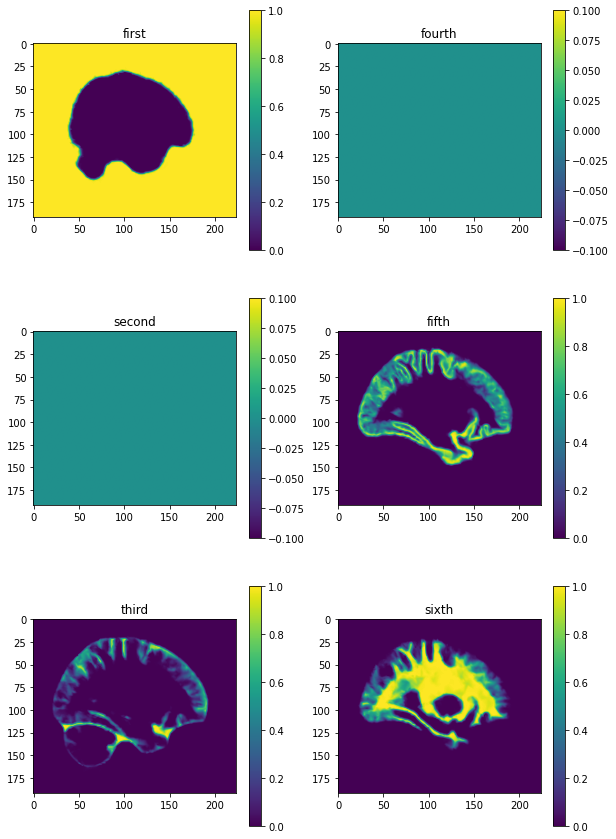

In [85]:
###prob_atlas.npz

fig, axs = plt.subplots(3,2, figsize = (10,15))
image = total_files[5][0]
im = axs[0,0].imshow(image[30,:,:,0])
axs[0,0].set_title("first")
plt.colorbar(im, ax = axs[0,0])

im = axs[1,0].imshow(image[50,:,:,1])
plt.colorbar(im, ax = axs[1,0])
axs[1,0].set_title("second")

im = axs[2,0].imshow(image[50,:,:,2])
plt.colorbar(im, ax = axs[2,0])
axs[2,0].set_title("third")


im = axs[0,1].imshow(image[50,:,:,3])
plt.colorbar(im, ax = axs[0,1])
axs[0,1].set_title("fourth")


im = axs[1,1].imshow(image[50,:,:,4])
plt.colorbar(im, ax = axs[1,1])
axs[1,1].set_title("fifth")



im = axs[2,1].imshow(image[50,:,:,5])
plt.colorbar(im, ax = axs[2,1])
axs[2,1].set_title("sixth")







In [86]:
###labels
print(total_files[6][0])

[ 2  3  4  7  8 10 11 12 13 14 15 16 17 18 24 28 31 41 42 43 46 47 49 50
 51 52 53 54 60 63]
